In [22]:
import tidy3d as td
from tidy3d import web
from matplotlib import pyplot as plt
import numpy as np

In [18]:
blank_square = "fdve-0d7176f8-bdd2-42c9-9eaf-56eee3c53386"
blank_crystal = "fdve-19966433-9ee6-45e0-b212-0ce5eb7bada4"
blank_cylinder = "fdve-dd69c7e1-6b52-4643-9ce0-f811a6567018"

substrate = "fdve-1c6b81dd-fe12-43b4-97b1-cdf4a9f6e964"


In [7]:
blank_crystal_dat = web.load(blank_crystal, "8x8x4CoreShell-NoSubstrate.hdf5")

c:\Users\bgh19\miniconda3\envs\lumerical\Lib\site-packages\rich\live.py:231: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

14:09:41 Central Daylight Time loading simulation from                          
                               8x8x4CoreShell-NoSubstrate.hdf5

14:09:55 Central Daylight Time WARNING: Simulation final field decay value of   
                               0.000713 is greater than the simulation shutoff  
                               threshold of 1e-05. Consider running the         
                               simulation again with a larger 'run_time'        
                               duration for more accurate results.              

In [57]:
farfield = blank_crystal_dat["fieldprojectionanglemonitor_0"]
print(farfield)

attrs={} type='FieldProjectionAngleData' monitor=FieldProjectionAngleMonitor(attrs={}, type='FieldProjectionAngleMonitor', center=(0.0, 0.0, 1.75), size=(10.0, 10.0, 0.0), name='fieldprojectionanglemonitor_0', interval_space=(1, 1, 1), colocate=True, freqs=(599584930576028.0, 545077209614570.9, 499654108813356.7, 461219177366175.4, 428274950411448.6, 422242908856357.75, 416378424011130.56, 410674609983580.8, 405124953091910.8, 399723287050685.3, 394463770115807.9, 389340864010407.8, 384349314471812.8, 379484133275967.06, 374740581610017.5, 370114154676560.5, 365600567424407.3, 352697017985898.8, 333102739208904.44, 315571016092646.3, 299792465288014.0, 272538604807285.44, 249827054406678.34), apodization=ApodizationSpec(attrs={}, start=None, end=None, width=None, type='ApodizationSpec'), normal_dir='+', exclude_surfaces=None, custom_origin=None, far_field_approx=True, window_size=(0.0, 0.0), medium=medium_0, proj_distance=1000000.0, theta=(0.0, 0.013574783071067006, 0.02714956614213401

In [23]:
coordinates = farfield.coords_spherical
theta = coordinates["theta"]
phi = coordinates["phi"]

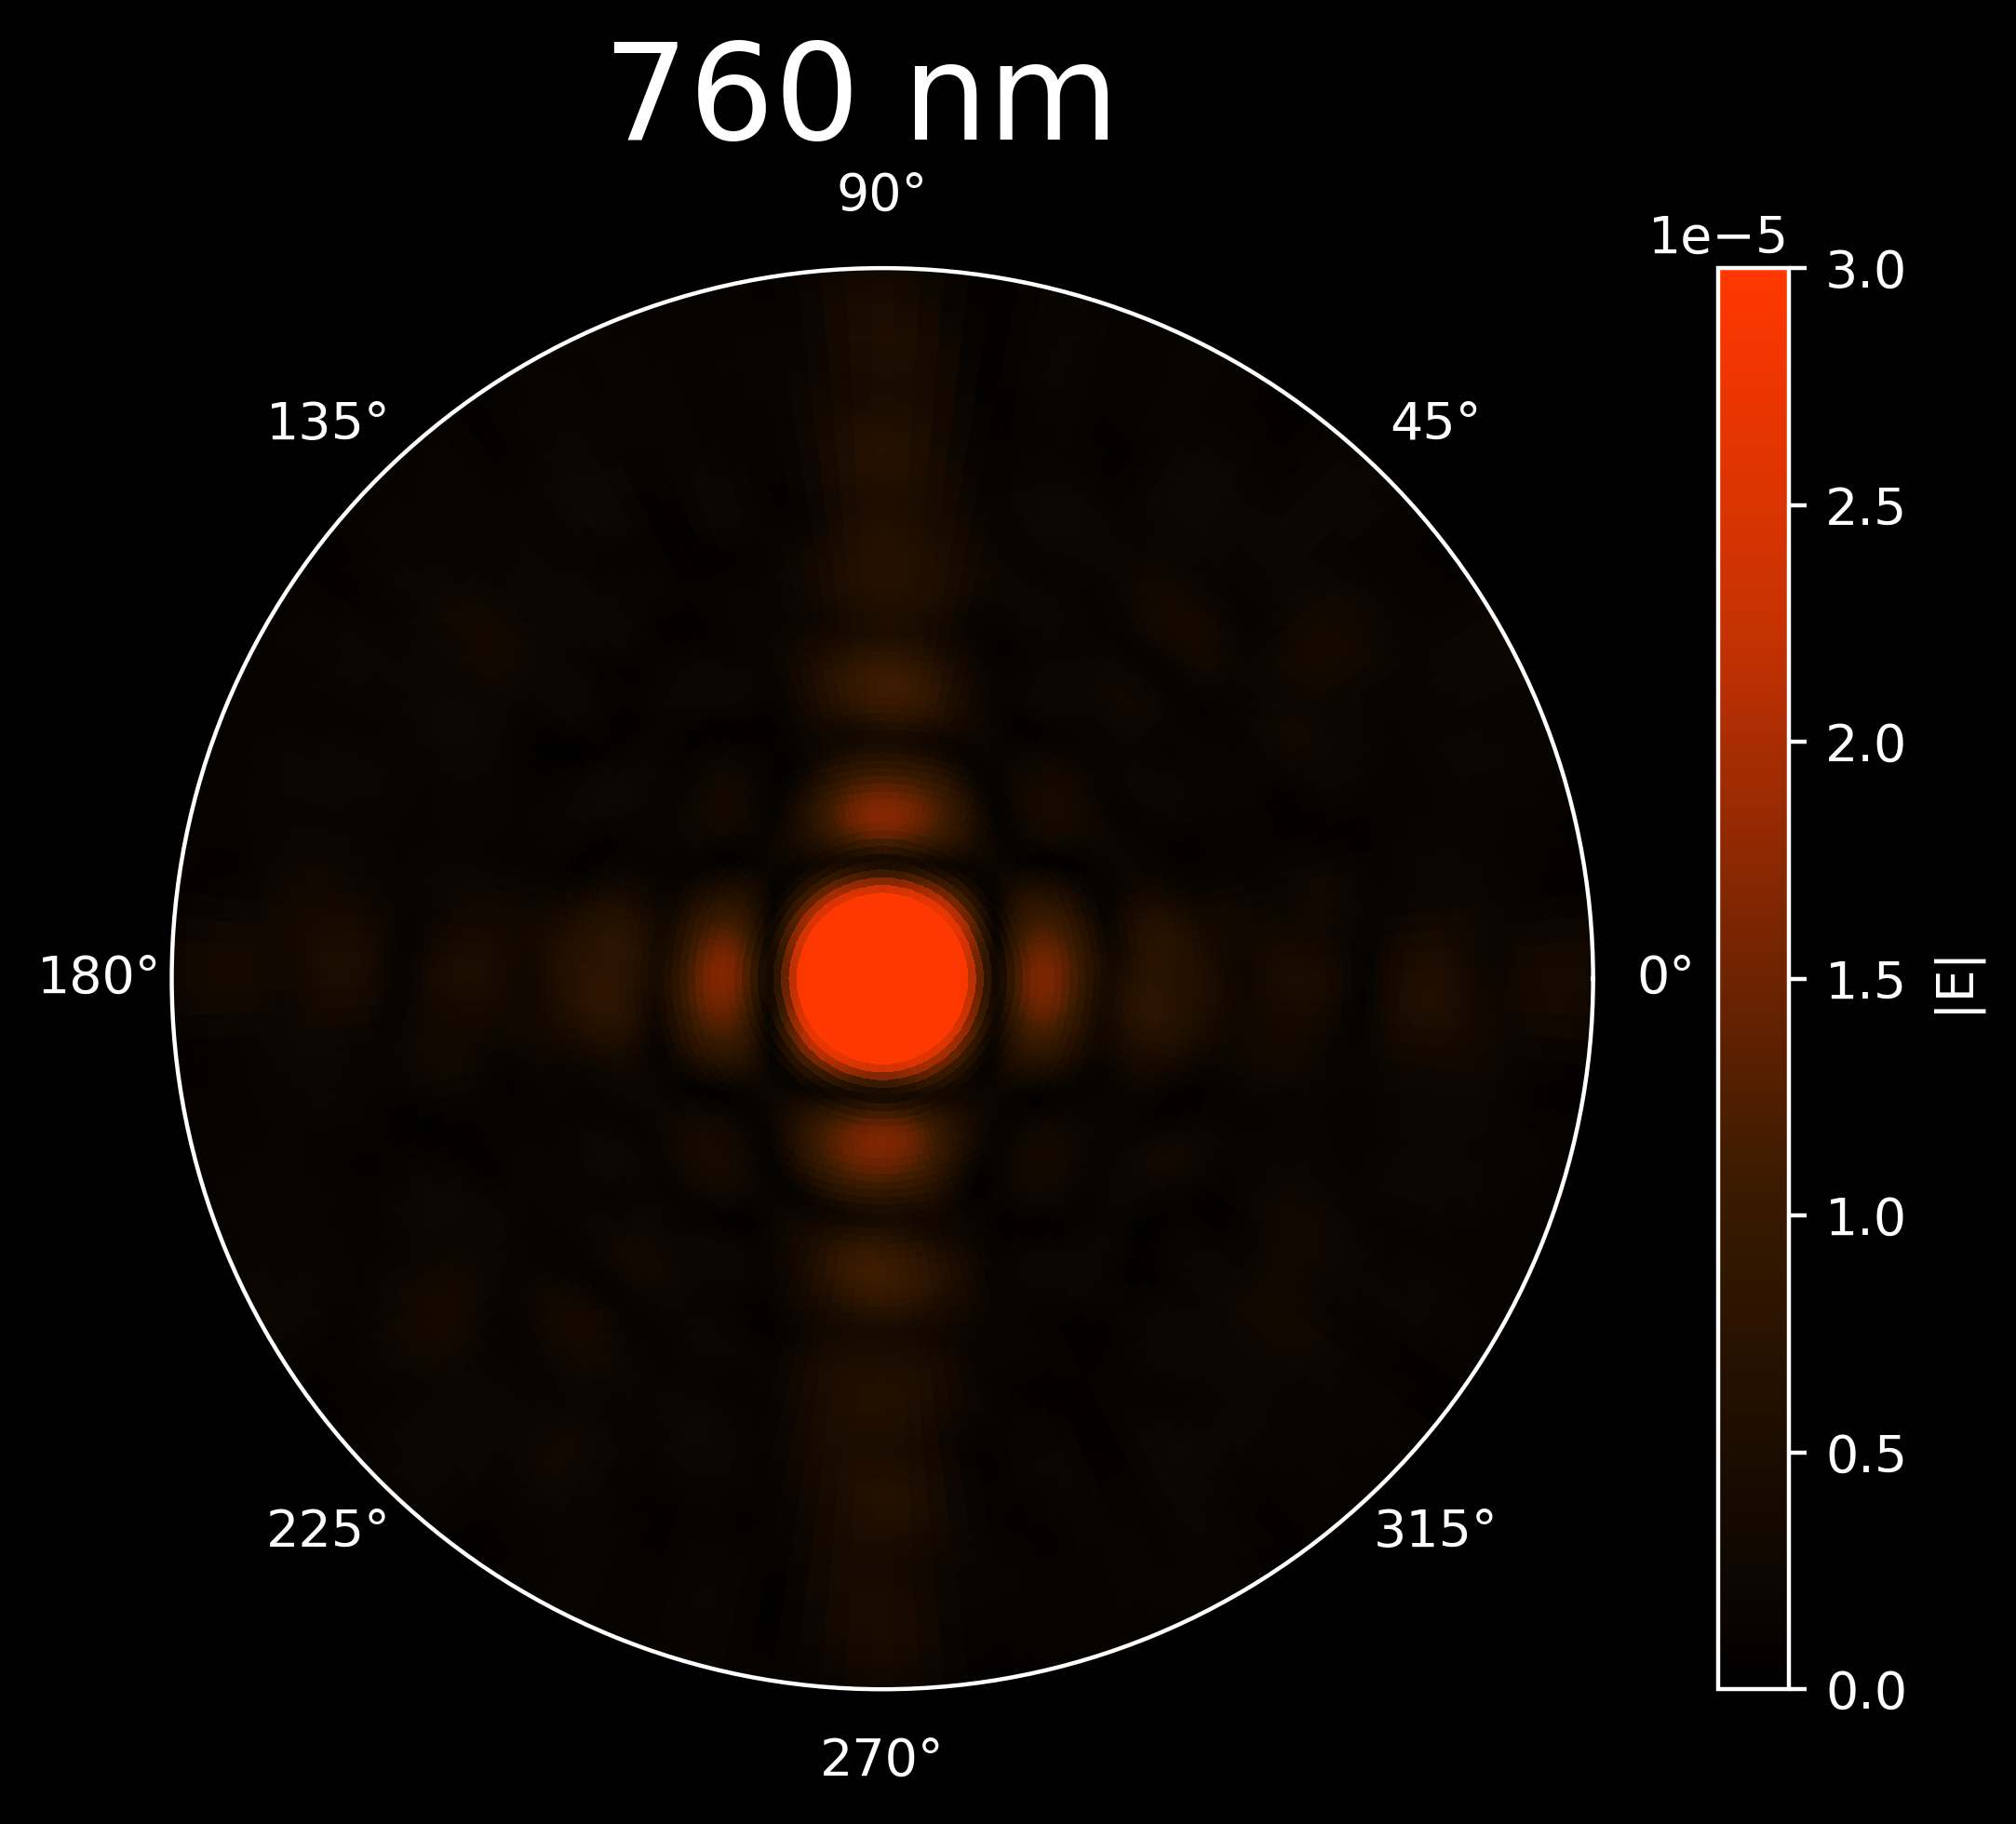

In [136]:
import matplotlib.colors as colors

plt.rcParams.update({'font.size': 10})
plt.style.use('dark_background')

freq_ind = 10
Ethet = farfield.Etheta.isel(f=freq_ind, r=0)
Ephi =farfield.Ephi.isel(f=freq_ind, r=0)
Er = farfield.Er.isel(f=freq_ind, r=0)
Etheta = np.sqrt(
    np.abs(Ethet)**2 +
    np.abs(Ephi)**2 + np.abs(Er)**2)

wavelen = (td.C_0/Etheta.f)*1000
fig, ax = plt.subplots(1, 1, tight_layout=False, figsize=(7, 5), subplot_kw={"projection": "polar"})
fig.set_dpi(400)
ax.grid(False)

new_color = colors.LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0:000000-36.1:3C1B00-74.8:C63203-100:FF3700
    (0.000, (0.000, 0.000, 0.000)),
    (0.361, (0.235, 0.106, 0.000)),
    (0.748, (0.776, 0.196, 0.012)),
    (1.000, (1.000, 0.216, 0.000))))
plot_data = np.abs(Etheta)

im = ax.pcolormesh(
    np.squeeze(phi),
    np.squeeze(theta) * 180 / np.pi,
    plot_data,
    cmap=new_color,
    vmax=3e-5,
    vmin= 0,
    shading="auto",
)
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("|E|")
# _ = ax.set_xlabel(r"$\phi$ (deg)", labelpad=10)

# label_position = ax.get_rlabel_position()
# _ = ax.text(
#     np.radians(label_position - 8),
#     ax.get_rmax() / 1.3,
#     "$\\theta$ (deg)",
#     rotation=label_position,
#     ha="center",
#     va="center",
# )
ax.set_rticks([])
plt.title(f"{wavelen:.0f} nm ", fontsize=26)
plt.savefig(f"FarFieldImage-{wavelen:.0f}nm-ColorBar-Dark.png")